In [29]:
import os
import json
import matplotlib.pyplot as plt
%matplotlib inline
BASE_DIRECTORY = os.getcwd()

def get_data(target_name):
    data_list = []
    name_list = []
    problem_name = None
    for (dirpath, dirnames, filenames) in os.walk(os.path.join(BASE_DIRECTORY, "data")):
        # Opening JSON file
        #print(dirpath, filenames)
        for filename in filenames:
            if target_name in filename:
                try:
                    with open(os.path.join(dirpath, filename)) as json_file:
                        data_list.append(json.load(json_file))
                        name_list.append(filename.split("_")[0])
                        tmp =  " ".join(filename.split("_")[1:4])
                        if problem_name is None:
                            problem_name = tmp
                        else:
                            if tmp != problem_name:
                                print("target", target_name)
                                print("More problems in same target..", problem_name,"and", tmp)
                                return 0
                except:
                    print(filename, "could not be read")
    return data_list, name_list, problem_name


In [50]:
def color(name):
    if "Mixture" in name:
        return "yellow"
    if "Gaussian" in name:
        return "blue"
    if "numpyro" in name:
        return "red"
    if "BOHAMIANN" in name:
        return "green"
    return "black"

def analysis_regression_performance(problem=  "Rosenbrock_dim_10"):
    data_list,name_list, problem_name = get_data(problem)
    fig, ax = plt.subplots(1,2, figsize=(12, 8))
    for data, name in zip(data_list,name_list):
        ax[0].plot(data["n_train_points_list"], data["mean_abs_pred_error"], color =color(name) , label=name)
    #fig, ax = plt.subplots()
    for data, name in zip(data_list,name_list):
        ax[1].plot(data["n_train_points_list"], data["mean_uncertainty_quantification"],color =color(name) , label=name)
    #ax[1].legend()

    ax[0].set_title("mean_abs_pred_error")
    ax[1].set_title("mean_uncertainty_quantification")
    print(problem_name)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())


Rosenbrock dim 10


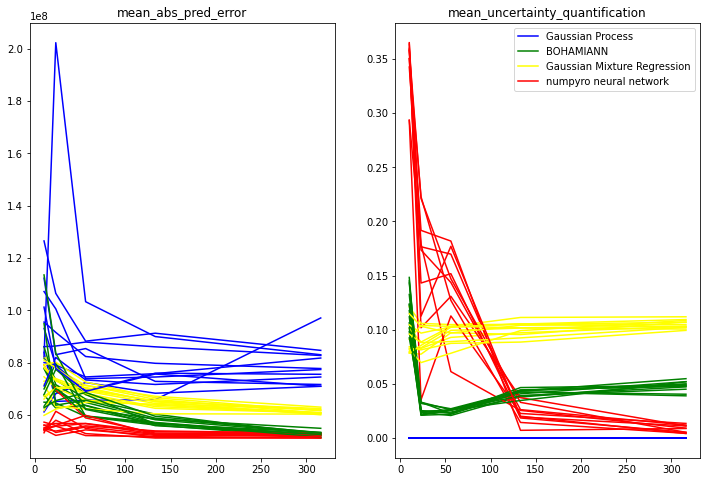

In [51]:
analysis_regression_performance()

Rosenbrock dim 2


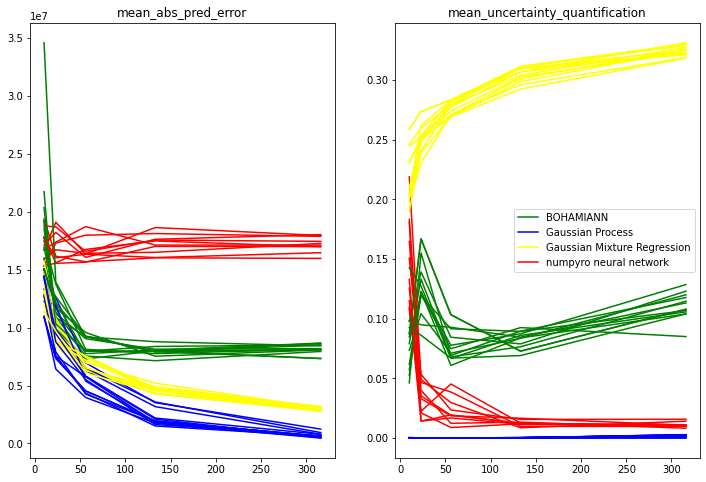

In [52]:
analysis_regression_performance("Rosenbrock_dim_2")

Zirilli dim 2


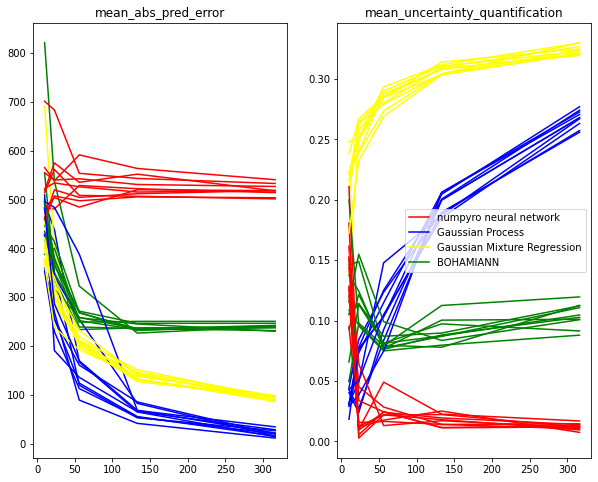

In [26]:
analysis_regression_performance("Zi")

Weierstrass dim 2


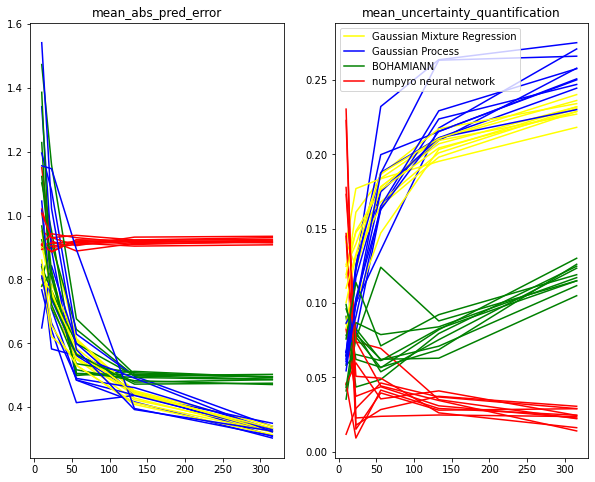

In [27]:
analysis_regression_performance("Wei")

Hartmann6 dim 6


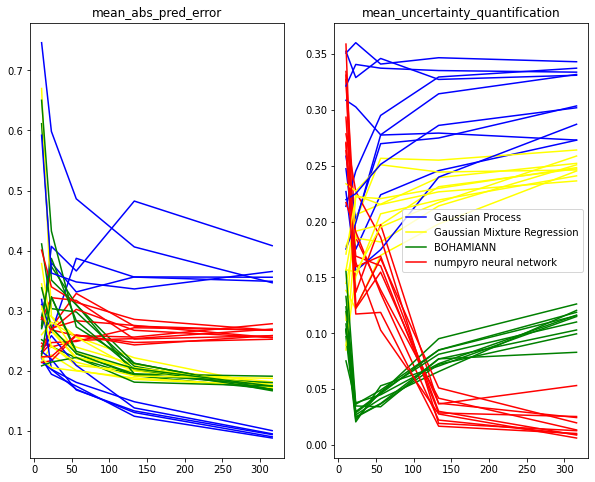

In [35]:
analysis_regression_performance("Hartmann6") #Whitley #Ackley01, #Cola, #Corana, #Hartmann6 #Hartmann3

Step dim 2


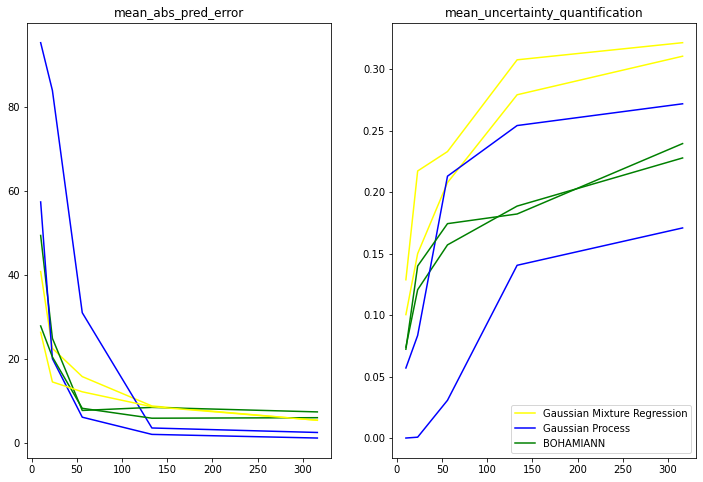

In [53]:
#Whitley #Ackley01, #Cola, #Corana, #Hartmann6 #Hartmann3
analysis_regression_performance("Step_dim_2") 